#### Extracting Dataset using Kaggle API

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Kaggle api 
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 156MB/s]
100% 1.06G/1.06G [00:07<00:00, 157MB/s]


#### Extracting the compressed dataset

In [ ]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


#### Importing the modules

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from keras.applications.vgg16 import VGG16 

import matplotlib.pyplot as plt
import cv2
import numpy as np

#### Image data loading

In [ ]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size=32,
    image_size=(224,224)
)

val_ds = keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size=32,
    image_size=(224,224)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


#### Normalize the data

In [ ]:
# Normalize

def process(image,label):
  image = tensorflow.cast(image/255,tensorflow.float32)
  return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [ ]:
train_ds

<MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
vgg16 = VGG16()

In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
type(vgg16)

keras.engine.functional.Functional

In [ ]:
model = Sequential()
type(model)

keras.engine.sequential.Sequential

In [ ]:
for layer in vgg16.layers:
  print(layer.__class__.__name__)

InputLayer
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D
Flatten
Dense
Dense
Dense


In [ ]:
for layer in vgg16.layers[:-1]:
  model.add(layer)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
for layer in model.layers:
  layer.trainable=False

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds,epochs=5,validation_data=val_ds)

Epoch 1/5
625/625 [==============================] - 126s 202ms/step - loss: 0.2796 - accuracy: 0.8838 - val_loss: 0.2413 - val_accuracy: 0.9020
Epoch 2/5
625/625 [==============================] - 127s 202ms/step - loss: 0.2515 - accuracy: 0.8949 - val_loss: 0.2207 - val_accuracy: 0.9128
Epoch 3/5
625/625 [==============================] - 127s 202ms/step - loss: 0.2395 - accuracy: 0.8997 - val_loss: 0.2113 - val_accuracy: 0.9156
Epoch 4/5
625/625 [==============================] - 127s 202ms/step - loss: 0.2325 - accuracy: 0.9009 - val_loss: 0.2100 - val_accuracy: 0.9148
Epoch 5/5
625/625 [==============================] - 127s 202ms/step - loss: 0.2237 - accuracy: 0.9064 - val_loss: 0.2053 - val_accuracy: 0.9094


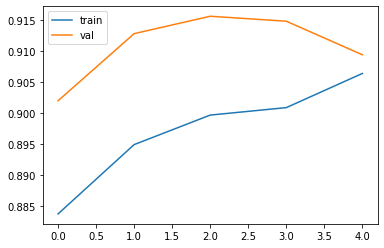

In [ ]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="val")
plt.legend()

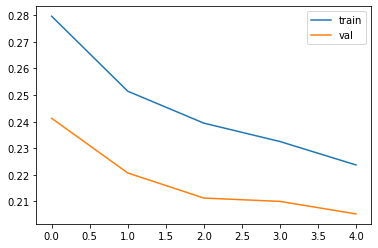

In [ ]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="val")
plt.legend()

#### Performing prediction using model 

input = dog image

In [ ]:
test_img = cv2.imread("/content/dog.jpg")

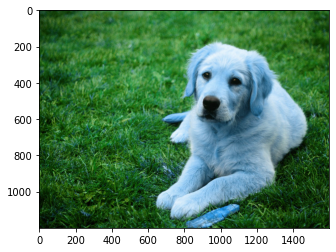

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1200, 1600, 3)

In [ ]:
test_img = cv2.resize(test_img,(224,224))

In [ ]:
test_input = test_img.reshape((1,224,224,3))

In [ ]:
y_prob = model.predict(test_input) 
y_pred = np.where(y_prob>=0.5,1,0)
y_pred

array([[1]])

input = cat image

In [ ]:
test_img = cv2.imread("/content/cat.jpg")

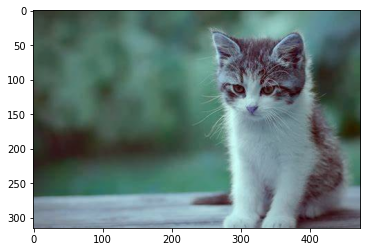

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(315, 474, 3)

In [ ]:
test_img = cv2.resize(test_img,(224,224))

In [ ]:
test_input = test_img.reshape((1,224,224,3))

In [ ]:
y_prob = model.predict(test_input) 
y_pred = np.where(y_prob>=0.5,1,0)
y_pred

array([[0]])